# Covid-19 Analysis and Machine Learning

See https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data for field descriptions and data source

### To Do:
    - Use Lat and Long_ to map locations with bubbles sized based on number of cases
    
    NOTE 1: Each row represents a location (perhaps a hospital) 
    NOTE 2: You may want to aggregate the data of each state, getting the average Lat and Long_. This will shrink the data set and make it more manageable. We want to consider each state as a whole for the purposes of our visualizations
    
#### Notebook Author: Adriel Kim
    

In [40]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
sns.set(style = 'darkgrid')
#matplotlib inline

In [41]:
usconfirmed_df = pd.read_csv('time_series_covid19_confirmed_US.csv')
usdeaths_df = pd.read_csv('time_series_covid19_deaths_US.csv')

In [42]:
usconfirmed_df.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,166,167,170,171,172,172,172,175,175,177
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,22,22,22,22,22,22,22,22,23,24
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,3260,3324,3397,3486,3647,3718,3776,3873,3935,4023
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,69,69,69,69,69,69,69,70,70,70


In [43]:
usdeaths_df.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,5,5,5,5,5,5,5,5,5,5
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,2,2,2,2,2,2,2,2,2,16
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,129,129,129,131,132,133,136,136,138,140
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,6,6,6,6,6,6,6,6,6,6


In [44]:
list(usconfirmed_df.columns[0:15])

['UID',
 'iso2',
 'iso3',
 'code3',
 'FIPS',
 'Admin2',
 'Province_State',
 'Country_Region',
 'Lat',
 'Long_',
 'Combined_Key',
 '1/22/20',
 '1/23/20',
 '1/24/20',
 '1/25/20']

## Preprocessing

To make the data more manageable, we must group by Province_State, summing up the columns of all the date columns.

We must split up the columns first so as to avoid summing columns such as Lat and Long_. These instead will be averaged

In [45]:
df_state =  usconfirmed_df.loc[:,'Province_State']
df_dates = usconfirmed_df.iloc[:,11:].fillna(0)
#df_temp.rename(columns={0:'Province_State'}, inplace = True)
#df_temp = df_temp[df_temp.Province_State!=0]
#df_group = df_temp.groupby('Province_State').sum()

In [46]:
df_state.head()

0              American Samoa
1                        Guam
2    Northern Mariana Islands
3                 Puerto Rico
4              Virgin Islands
Name: Province_State, dtype: object

In [47]:
df_dates.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,166,167,170,171,172,172,172,175,175,177
2,0,0,0,0,0,0,0,0,0,0,...,22,22,22,22,22,22,22,22,23,24
3,0,0,0,0,0,0,0,0,0,0,...,3260,3324,3397,3486,3647,3718,3776,3873,3935,4023
4,0,0,0,0,0,0,0,0,0,0,...,69,69,69,69,69,69,69,70,70,70


In [48]:
df_temp = pd.concat([df_state,df_dates], axis = 1)#Axis 1 adds 'horizontally', Axis 0 works for homogenous data set where you just wanna add more rows
df_temp.head()

,Province_State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20
0,American Samoa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Guam,0,0,0,0,0,0,0,0,0,...,166,167,170,171,172,172,172,175,175,177
2,Northern Mariana Islands,0,0,0,0,0,0,0,0,0,...,22,22,22,22,22,22,22,22,23,24
3,Puerto Rico,0,0,0,0,0,0,0,0,0,...,3260,3324,3397,3486,3647,3718,3776,3873,3935,4023
4,Virgin Islands,0,0,0,0,0,0,0,0,0,...,69,69,69,69,69,69,69,70,70,70


In [49]:
df_deathAgg = df_temp.groupby('Province_State').sum().reset_index()
df_deathAgg = df_deathAgg.drop(['Province_State'], axis = 1)
df_deathAgg.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20
0,0,0,0,0,0,0,0,0,0,0,...,14986,15650,16032,16530,17031,17359,17952,18630,18766,18851
1,0,0,0,0,0,0,0,0,0,0,...,408,410,411,424,429,433,459,466,486,504
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,1,1,1,1,1,...,16575,16864,17318,17877,18472,19258,19936,20129,21264,22356
4,0,0,0,0,0,0,0,0,0,0,...,6029,6180,6277,6538,6777,7013,7253,7443,7818,8067


## Preprocessing part 2

In [50]:
df_state = usconfirmed_df.loc[:,'Province_State']
df_location = usconfirmed_df.loc[:,['Lat','Long_']]
df_loctemp = pd.concat([df_state, df_location], axis = 1)
df_loctemp.head()

,Province_State,Lat,Long_
0,American Samoa,-14.2710,-170.1320
1,Guam,13.4443,144.7937
2,Northern Mariana Islands,15.0979,145.6739
3,Puerto Rico,18.2208,-66.5901
4,Virgin Islands,18.3358,-64.8963


In [51]:
#reset_index() very important step after groupby
df_locAgg = df_loctemp.groupby('Province_State').mean().reset_index()#we can use reset_index to get our indics back and make into a usable dataframe
df_locAgg.head()

,Province_State,Lat,Long_
0,Alabama,31.931113,-84.196785
1,Alaska,56.373544,-136.429656
2,American Samoa,-14.271000,-170.132000
3,Arizona,29.714033,-98.349911
4,Arkansas,34.005087,-90.033096


## Preprocessing Final

In [52]:
df_usConfirmed = pd.concat([df_locAgg,df_deathAgg],axis = 1)
df_usConfirmed.head(10)

,Province_State,Lat,Long_,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20
0,Alabama,31.931113,-84.196785,0,0,0,0,0,0,0,...,14986,15650,16032,16530,17031,17359,17952,18630,18766,18851
1,Alaska,56.373544,-136.429656,0,0,0,0,0,0,0,...,408,410,411,424,429,433,459,466,486,504
2,American Samoa,-14.271000,-170.132000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Arizona,29.714033,-98.349911,0,0,0,0,1,1,1,...,16575,16864,17318,17877,18472,19258,19936,20129,21264,22356
4,Arkansas,34.005087,-90.033096,0,0,0,0,0,0,0,...,6029,6180,6277,6538,6777,7013,7253,7443,7818,8067
5,California,36.582496,-116.704308,0,0,0,0,2,2,2,...,96400,99387,101050,103813,106622,109895,111951,114733,117215,119348
6,Colorado,37.755612,-102.289687,0,0,0,0,0,0,0,...,24256,24552,24754,25107,25598,26084,26364,26563,26774,27046
7,Connecticut,33.290944,-58.125464,0,0,0,0,0,0,0,...,40873,41303,41288,41559,41762,42022,42201,42740,42979,43091
8,Delaware,23.465566,-45.319942,0,0,0,0,0,0,0,...,8965,9066,9096,9171,9236,9422,9498,9605,9685,9712
9,Diamond Princess,0.000000,0.000000,0,0,0,0,0,0,0,...,49,49,49,49,49,49,49,49,49,49


In [53]:
us_columns = list(df_usConfirmed.columns)
alab_data = df_usConfirmed.iloc[0]
df_alabama = pd.DataFrame(columns = us_columns).append(alab_data)
df_alabama

,Province_State,Lat,Long_,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20
0,Alabama,31.931113,-84.196785,0,0,0,0,0,0,0,...,14986,15650,16032,16530,17031,17359,17952,18630,18766,18851


In [54]:
alabama_trans = df_alabama.T#Tranpose
alabama_trans = alabama_trans.drop(index = ['Province_State','Lat','Long_']).reset_index()
alabama_trans.rename(columns={0:"Alabama","index":"Date"}, inplace = True)
alabama_trans.head()

,Date,Alabama
0,1/22/20,0
1,1/23/20,0
2,1/24/20,0
3,1/25/20,0
4,1/26/20,0


In [55]:
alabama_trans['Date'] = pd.to_datetime(alabama_trans['Date'])
alabama_trans.head()

,Date,Alabama
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0


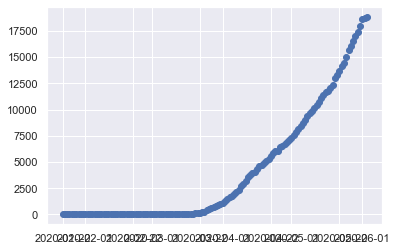

In [56]:
plt.scatter(alabama_trans['Date'], alabama_trans['Alabama'])

# Visualizations and Machine Learning!

More to do, just some basic plots for now

### To do:
 - How does day of the week affect number of daily cases?
 - Make a new set of columns indicating daily increase!

In [74]:
def plot_State(stateName, size):
    states = list(df_usConfirmed['Province_State'])
    index = states.index(stateName)
    us_columns = list(df_usConfirmed.columns)

    state_data = df_usConfirmed.iloc[index]
    
    df_state = pd.DataFrame(columns = us_columns).append(state_data)
    state_trans = df_state.T#Tranpose
    state_trans = state_trans.drop(index = ['Province_State','Lat','Long_']).reset_index()
    state_trans.rename(columns={index:'state',"index":"Date"}, inplace = True)
    state_trans['Date'] = pd.to_datetime(state_trans['Date'])
    #print(state_trans)
    plt.figure(figsize = size)
    plt.scatter(state_trans['Date'], state_trans['state'])
    plt.ylabel("Confirmed")
    plt.xlabel("Time")
    plt.title('Covid-19 %s'% stateName)
    plt.show()
    print("Current Number of Cases:", max(state_trans['state']))

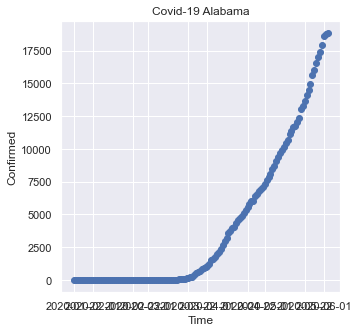

Current Number of Cases: 18851


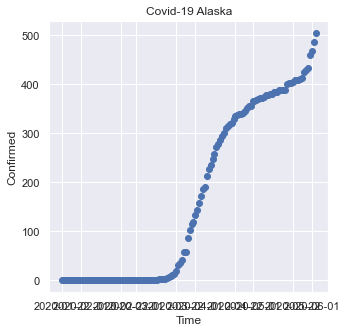

Current Number of Cases: 504


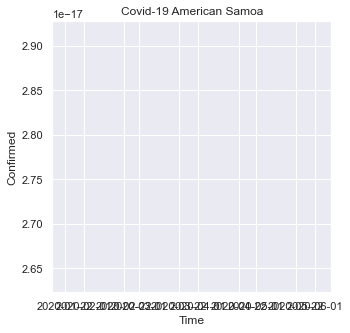

Current Number of Cases: 0


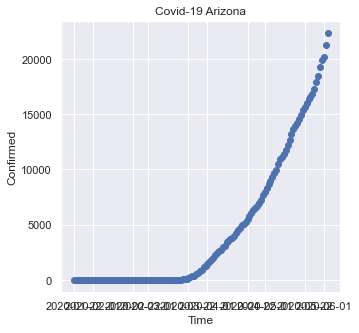

Current Number of Cases: 22356


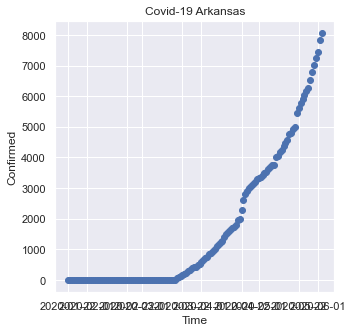

Current Number of Cases: 8067


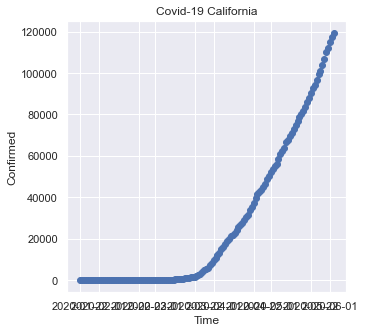

Current Number of Cases: 119348


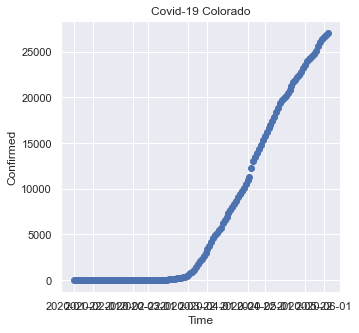

Current Number of Cases: 27046


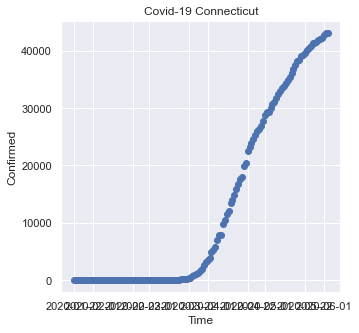

Current Number of Cases: 43091


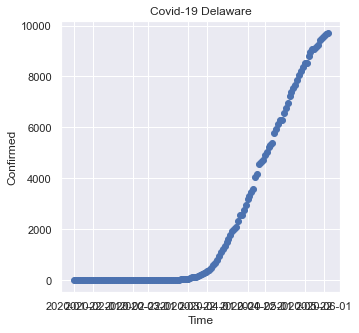

Current Number of Cases: 9712


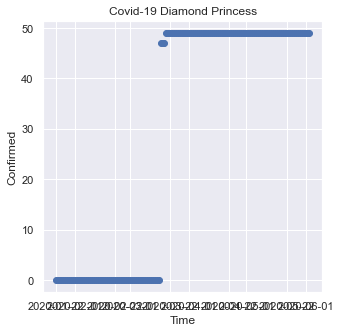

Current Number of Cases: 49


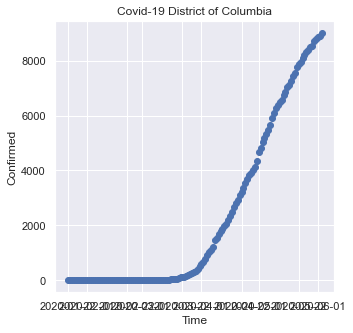

Current Number of Cases: 9016


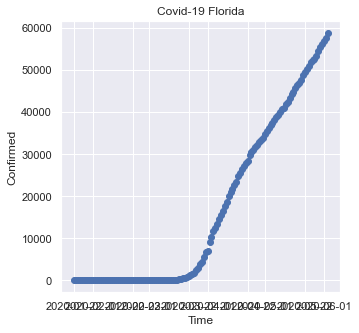

Current Number of Cases: 58764


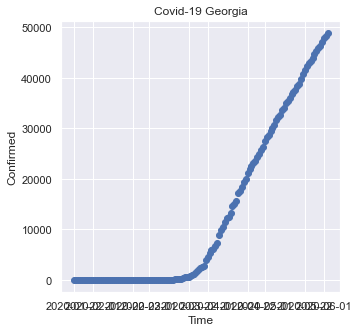

Current Number of Cases: 48894


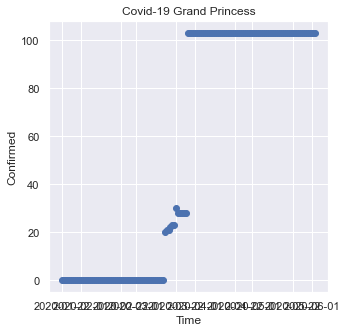

Current Number of Cases: 103


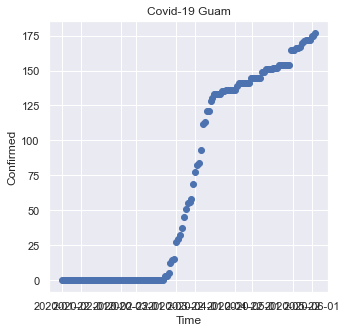

Current Number of Cases: 177


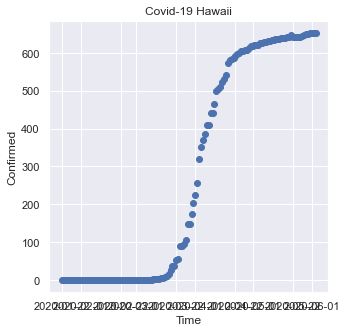

Current Number of Cases: 653


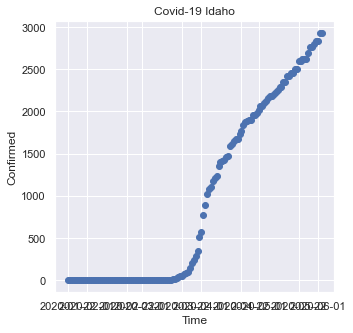

Current Number of Cases: 2933


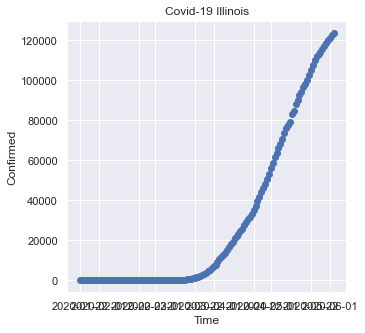

Current Number of Cases: 123830


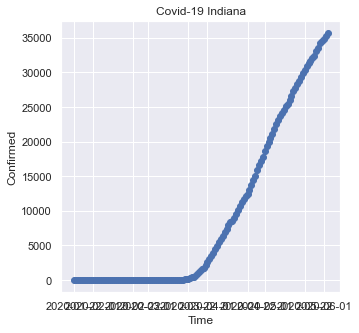

Current Number of Cases: 35712


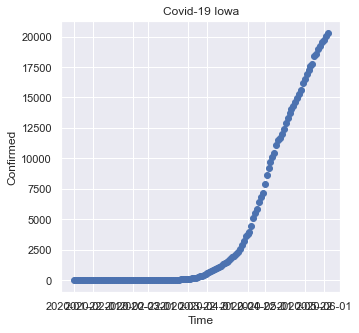

Current Number of Cases: 20300


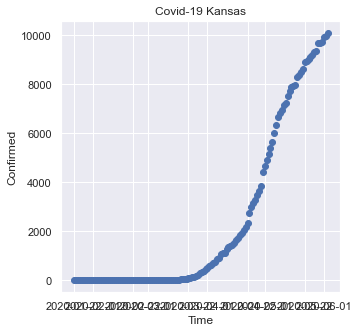

Current Number of Cases: 10092


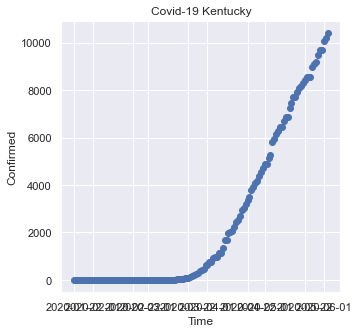

Current Number of Cases: 10410


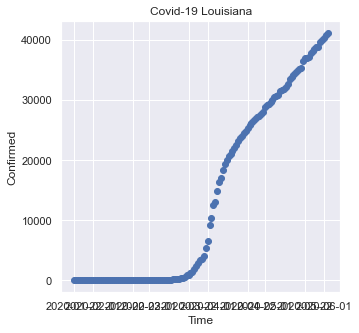

Current Number of Cases: 41133


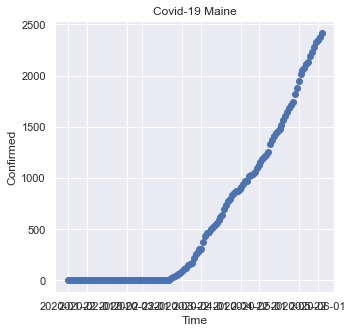

Current Number of Cases: 2418


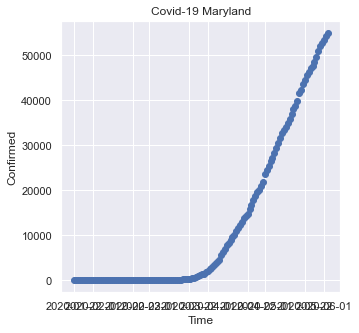

Current Number of Cases: 54982


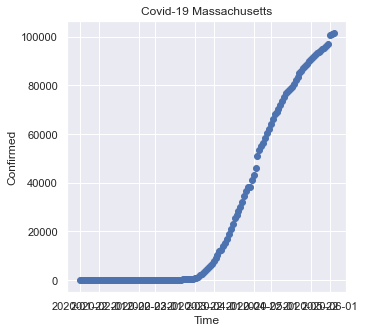

Current Number of Cases: 101592


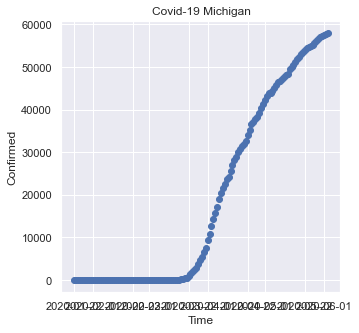

Current Number of Cases: 58035


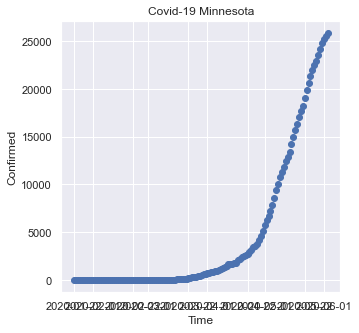

Current Number of Cases: 25870


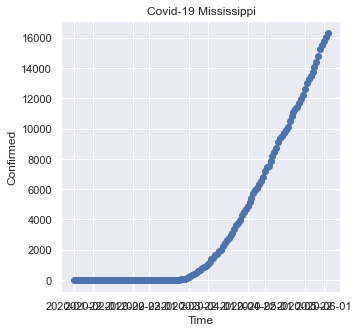

Current Number of Cases: 16322


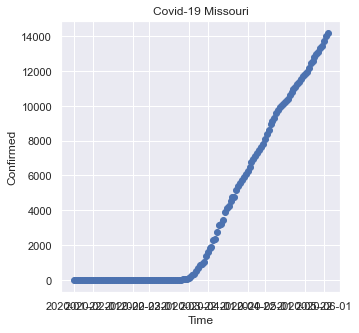

Current Number of Cases: 14189


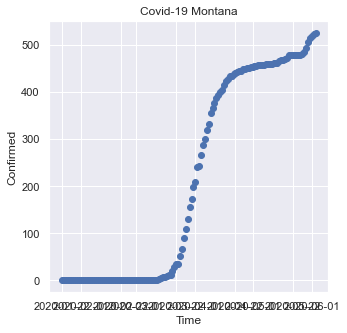

Current Number of Cases: 525


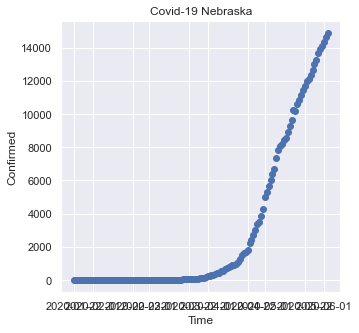

Current Number of Cases: 14885


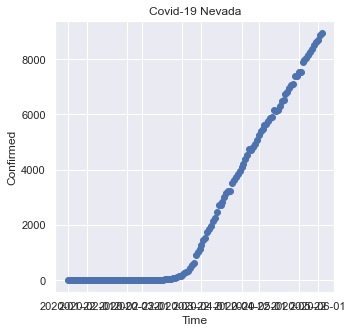

Current Number of Cases: 8951


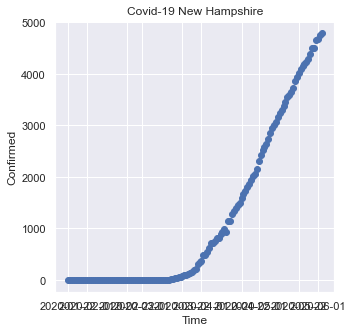

Current Number of Cases: 4795


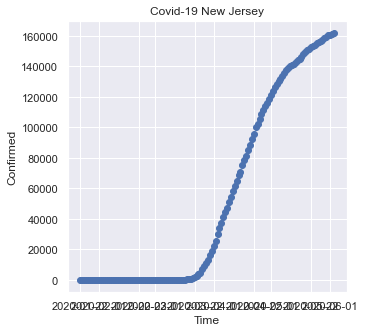

Current Number of Cases: 162068


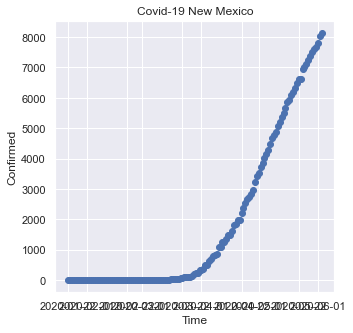

Current Number of Cases: 8140


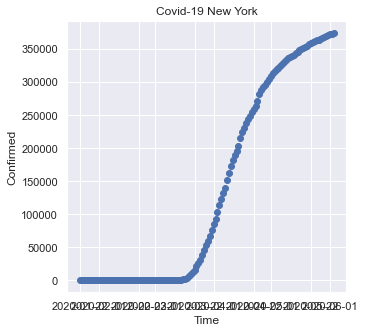

Current Number of Cases: 374085


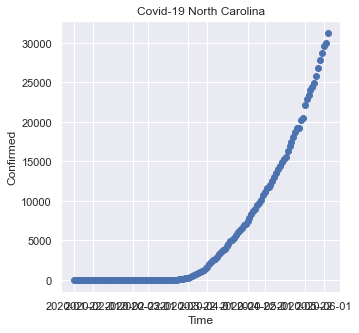

Current Number of Cases: 31276


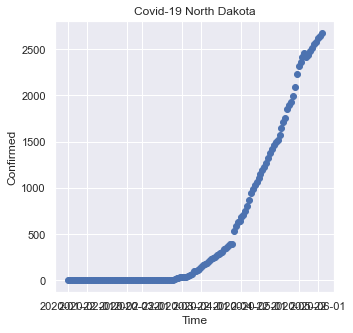

Current Number of Cases: 2679


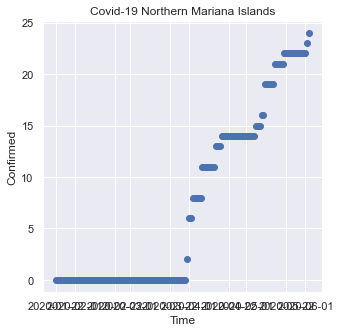

Current Number of Cases: 24


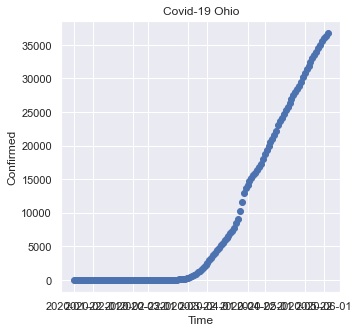

Current Number of Cases: 36792


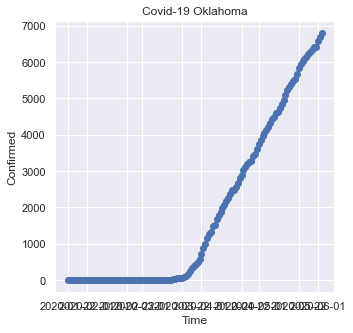

Current Number of Cases: 6805


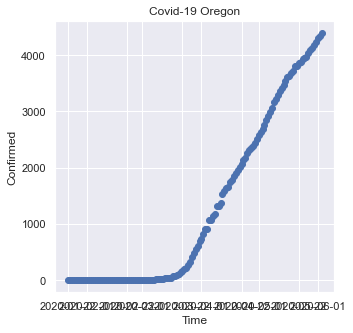

Current Number of Cases: 4399


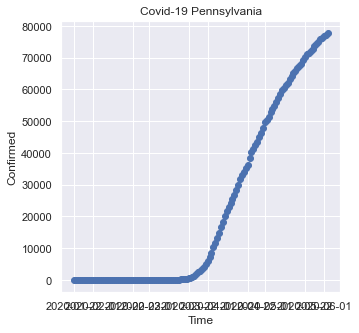

Current Number of Cases: 77780


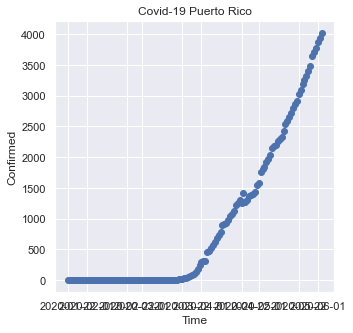

Current Number of Cases: 4023


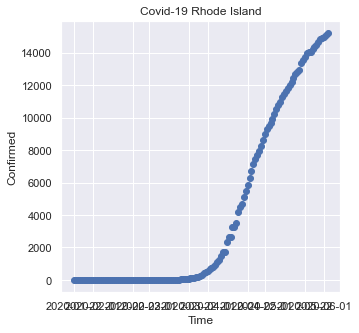

Current Number of Cases: 15219


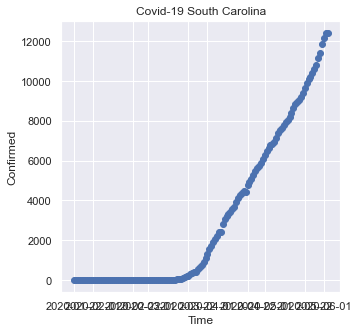

Current Number of Cases: 12415


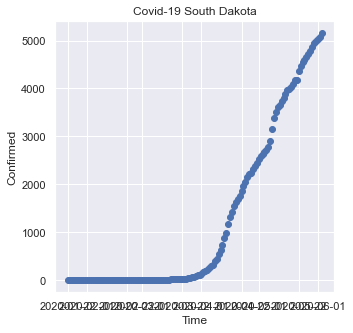

Current Number of Cases: 5162


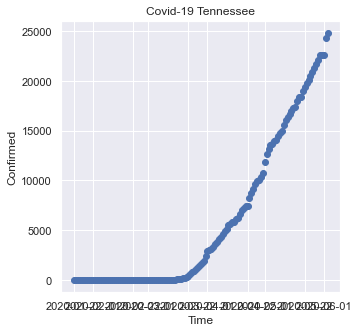

Current Number of Cases: 24833


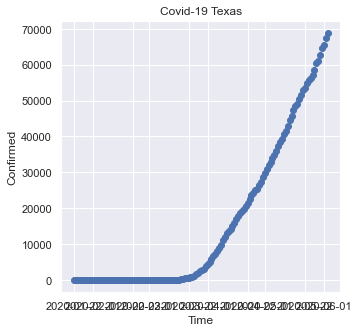

Current Number of Cases: 68877


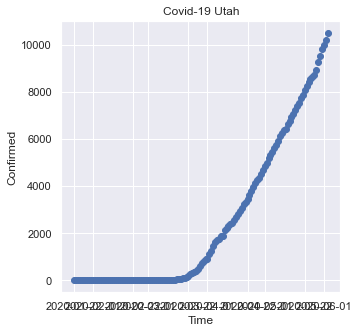

Current Number of Cases: 10497


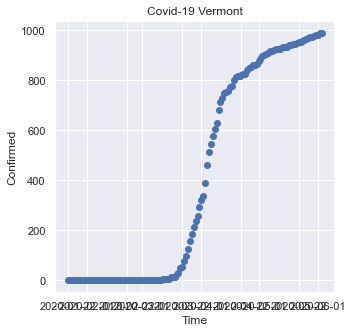

Current Number of Cases: 990


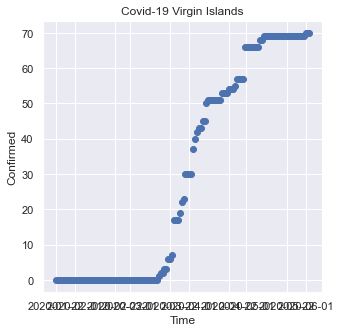

Current Number of Cases: 70


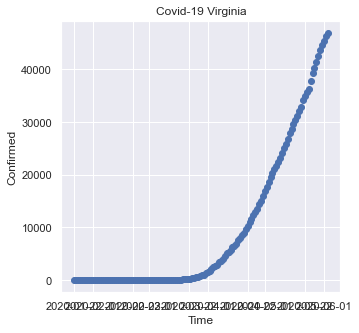

Current Number of Cases: 46905


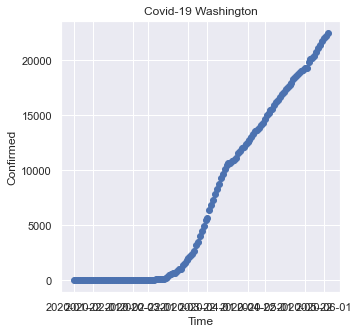

Current Number of Cases: 22484


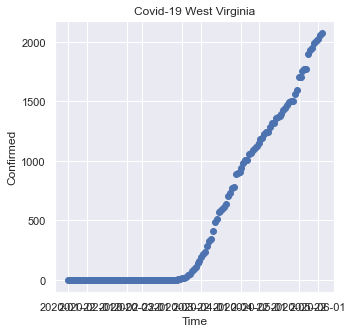

Current Number of Cases: 2077


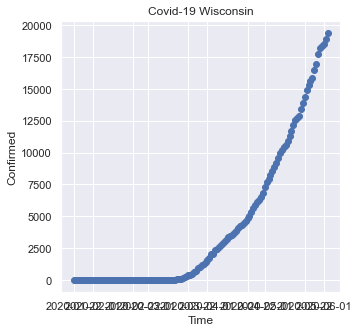

Current Number of Cases: 19400


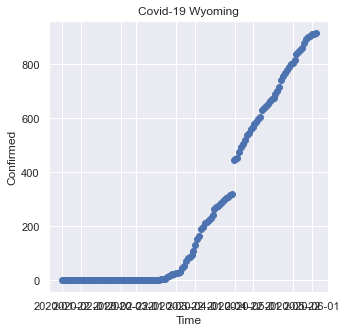

Current Number of Cases: 915


In [75]:
for state in df_usConfirmed['Province_State']:
    plot_State(state, (5,5))

## State Covid-19 Visualizing Total Daily Cases

Enter the state you want to visualize in the textbox below

Text(value='')

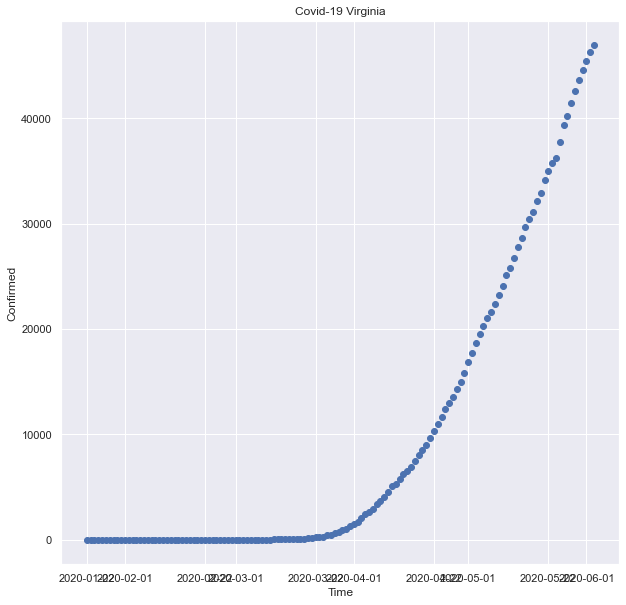

Current Number of Cases: 46905


In [76]:
from IPython.display import display
from ipywidgets import widgets

text = widgets.Text()
display(text)

def handle_submit(sender):
    states = np.asarray(list(df_usConfirmed['Province_State']))
    #states = np.char.upper(states)
    stateName = text.value#.upper()
    if(stateName in states):
        plot_State(stateName,(10,10))
    else:
        print("Invalid input!")

text.on_submit(handle_submit)

## Visualizing Daily Change in Number of Cases

Kind of janky, but you can see how daily cases change over time

In [60]:
#We will concat state names after this processing
df_diff = df_usConfirmed.drop(columns = ['Province_State',
                                          'Lat','Long_'],axis = 1)
#Handy pandas function that gets the difference with previous column!
df_diff = df_diff.diff(axis  = 1).fillna(0)
df_diff.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,508.0,664.0,382.0,498.0,501.0,328.0,593.0,678.0,136.0,85.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,1.0,13.0,5.0,4.0,26.0,7.0,20.0,18.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,198.0,289.0,454.0,559.0,595.0,786.0,678.0,193.0,1135.0,1092.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,107.0,151.0,97.0,261.0,239.0,236.0,240.0,190.0,375.0,249.0


In [61]:
df_other = df_usConfirmed.iloc[:,0:3]
df_diff = pd.concat([df_other,df_diff], axis = 1)
df_diff.head()

,Province_State,Lat,Long_,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20
0,Alabama,31.931113,-84.196785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,508.0,664.0,382.0,498.0,501.0,328.0,593.0,678.0,136.0,85.0
1,Alaska,56.373544,-136.429656,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,1.0,13.0,5.0,4.0,26.0,7.0,20.0,18.0
2,American Samoa,-14.271000,-170.132000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Arizona,29.714033,-98.349911,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,198.0,289.0,454.0,559.0,595.0,786.0,678.0,193.0,1135.0,1092.0
4,Arkansas,34.005087,-90.033096,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,107.0,151.0,97.0,261.0,239.0,236.0,240.0,190.0,375.0,249.0


In [62]:
def plotChange_State(stateName):
    states = list(df_diff['Province_State'])
    index = states.index(stateName)
    us_columns = list(df_diff.columns)

    state_data = df_diff.iloc[index]
    
    df_state = pd.DataFrame(columns = us_columns).append(state_data)
    state_trans = df_state.T#Tranpose
    state_trans = state_trans.drop(index = ['Province_State','Lat','Long_']).reset_index()
    state_trans.rename(columns={index:'state',"index":"Date"}, inplace = True)
    state_trans['Date'] = pd.to_datetime(state_trans['Date'])
    #print(state_trans)
    plt.figure(figsize = (10,10))
    plt.bar(state_trans['Date'], state_trans['state'])
    plt.ylabel("Daily Cases")
    plt.xlabel("Time")
    plt.title('Covid-19 %s'% stateName)
    plt.show()

## Covid-19 Daily State Cases Visualizer

Text(value='')

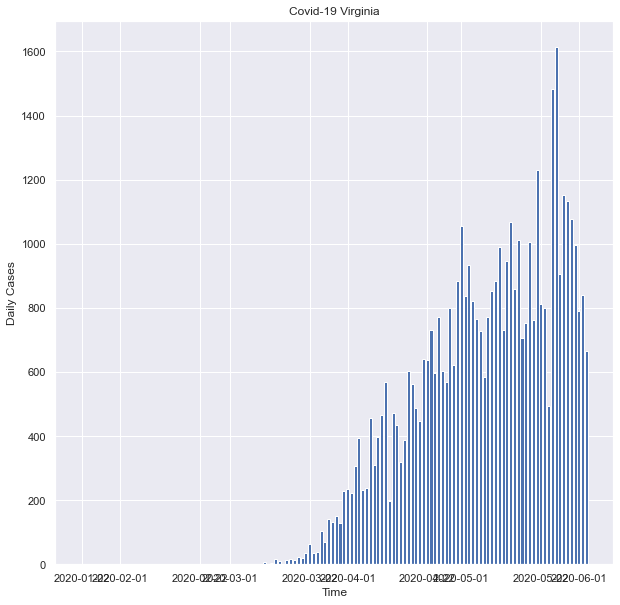

In [72]:
from IPython.display import display
from ipywidgets import widgets

text = widgets.Text()
display(text)

def handle_submit(sender):
    states = np.asarray(list(df_usConfirmed['Province_State']))
    #states = np.char.upper(states)
    stateName = text.value#.upper()
    if(stateName in states):
        plotChange_State(stateName)
    else:
        print("Invalid input!")

text.on_submit(handle_submit)

## Covid-19 and the Day of the Week in the US

##### How do daily change in covid-19 confirmed cases change over certain days of the week?

Preprocessing:
    Get separate data frames for each day of the week. We can do this easily with the dates as datetime objects
   1. Drop unncessary columns
   2. Use pandas function 'diff' to get differences between previous column
   2. Sum up all rows for each date
   2. Convert dates to datetime objects
   3. Drop Lat, Long_, and Province_State
   4. Aggregate data using groupby based on day of the week each row belongs to
   5. Day of the week can be retrieved by accessing a member of the datetimes
   
Analysis:
1. Compare statistics of the data frames such as mean, median, max, min. You can use pandas describe function to do this easily.
2. Plot each data frame using Covid-19 Daily State Cases Visualizer

In [64]:
us_trans = df_usConfirmed.iloc[:,3:]
us_trans = us_trans.diff(axis = 1).fillna(0)
us_trans = us_trans.sum().reset_index()
us_trans.rename(columns = {'index':'Date', 0: "Cases"}, inplace = True)
us_trans['Date'] = pd.to_datetime(us_trans['Date'])
us_trans['Day'] = us_trans['Date'].dt.weekday.astype('str')
us_trans.head(10)

,Date,Cases,Day
0,2020-01-22,0.0,2
1,2020-01-23,0.0,3
2,2020-01-24,1.0,4
3,2020-01-25,0.0,5
4,2020-01-26,3.0,6
5,2020-01-27,0.0,0
6,2020-01-28,0.0,1
7,2020-01-29,0.0,2
8,2020-01-30,0.0,3
9,2020-01-31,2.0,4


In [65]:
#NOTE: Make sure that column you changing is of the same type. Use astype in preprocessing! >_<
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

for i in range (0,us_trans['Day'].size):
    dow = days[int(us_trans.at[i,'Day'])]
    us_trans.at[i,'Day'] = dow
    
us_trans.head()

,Date,Cases,Day
0,2020-01-22,0.0,Wednesday
1,2020-01-23,0.0,Thursday
2,2020-01-24,1.0,Friday
3,2020-01-25,0.0,Saturday
4,2020-01-26,3.0,Sunday


In [66]:
#Need to use data filtering if you only want data points of a certain day
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
monday_df = None
tuesday_df = None
wednesday_df = None
thursday_df = None
friday_df = None
saturday_df = None
sunday_df = None
week_dfs = [monday_df,tuesday_df, wednesday_df, thursday_df, friday_df, saturday_df, sunday_df]

for i in range(0,len(days)):
    week_dfs[i] = us_trans.loc[(us_trans['Day'] == days[i])]


## Results

Friday seems to be the worst day to go out while Monday is the safest

In [67]:
sums = []
for i in range(0, len(days)):
    sums.append(week_dfs[i]['Cases'].sum())
    
maxCases = max(sums)
maxDay = days[sums.index(maxCases)]
minCases = min(sums)
minDay = days[sums.index(minCases)]
print("%s has the highest total daily change in cases with a count of %d!" %(maxDay, maxCases))
print("%s has the lowest total daily change in cases with a count of %d!" %(minDay, minCases))

Friday has the highest total daily change in cases with a count of 291703!
Monday has the lowest total daily change in cases with a count of 238093!


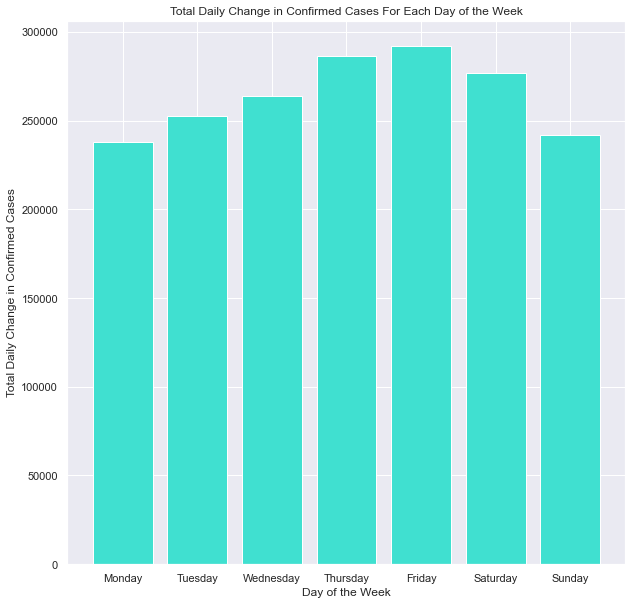

In [68]:
plt.figure(figsize = (10,10))
plt.bar(days, sums, color = 'turquoise')
plt.xlabel('Day of the Week')
plt.ylabel('Total Daily Change in Confirmed Cases')
plt.title('Total Daily Change in Confirmed Cases For Each Day of the Week')
plt.show()

In [69]:
#Janky, the time axis is overlapping ;(
def plotWeek(week_df, day):
    plt.figure(figsize=(15,3.3))
    plt.bar(week_df['Date'],week_df['Cases'], color = 'turquoise',width = 5)
    plt.xlabel('Time')
    plt.ylabel('Total Daily Change in Confirmed Cases')
    title = 'Total Daily Change in Confirmed Cases On '+ day+'s'
    plt.title(title)
    plt.show()
    

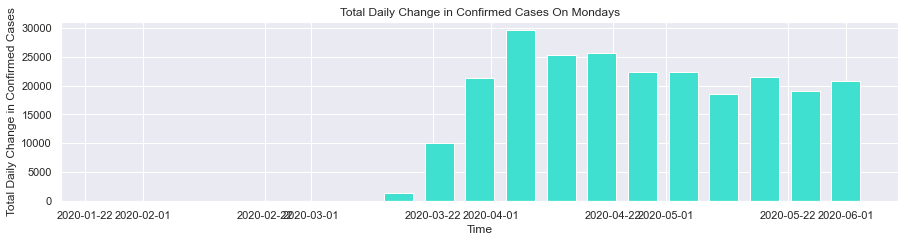

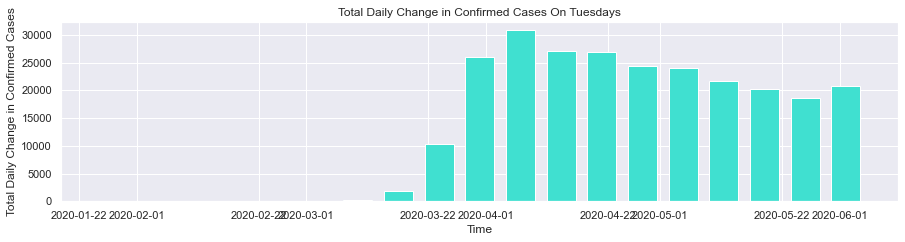

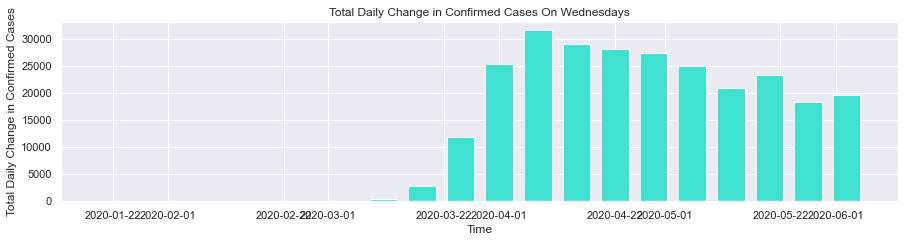

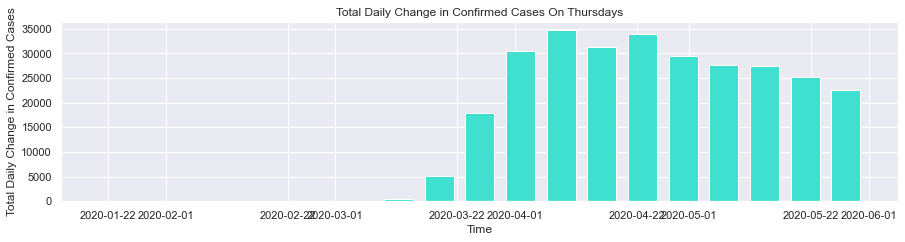

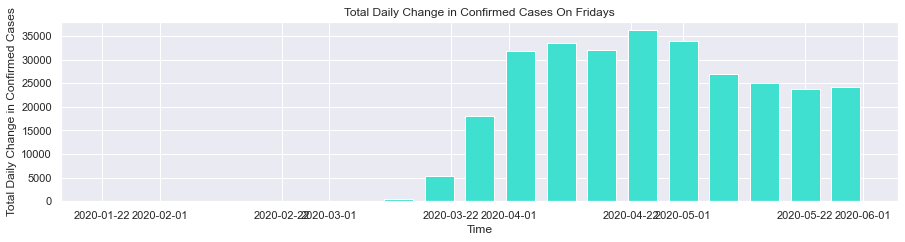

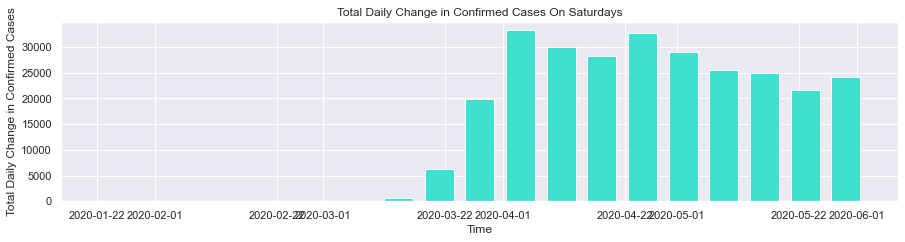

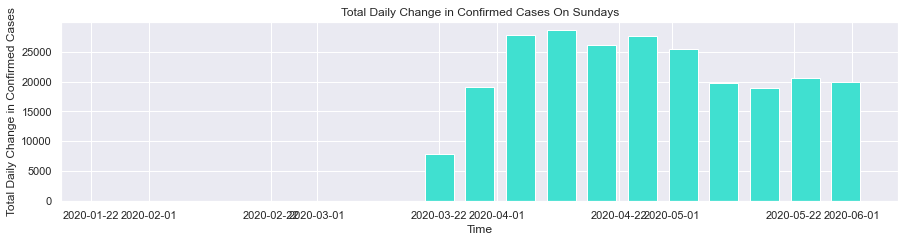

In [70]:
for i in range(0, len(days)):
    plotWeek(week_dfs[i],days[i])

## Map Visualization

Points are colored based off their clustering using DBSCAN clustering

Having trouble downloading dependencies ;\

In [71]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler#also experiment with minmaxscaler and see how it makes a difference
from mpl_toolkits.basemap import Basemap
from pylab import rcParams

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [ ]:
df_temp = usconfirmed_df.loc[:,'Province_State']
df_temp2 = usconfirmed_df.loc[:,['Lat','Long_']]
df_map = pd.concat([df_temp, df_temp2], axis = 1)
print(df_map.shape)
df_map.head()



# Machine Learning: Using Regression to Predict Daily Number of Cases In The US

Note: This is only for my own practice and may contain faults

In [77]:
from scipy.optimize import curve_fit
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score

## Data Preparation

In [78]:
df_usTotal = df_usConfirmed.drop(columns = ['Lat',"Long_",'Province_State'], axis = 1).sum().reset_index().reset_index()
df_usTotal.rename(columns = {'index':'Date',0:"Cases",'level_0':'Index'},inplace= True)
df_usTotal['Date'] = pd.to_datetime(df_usTotal['Date'])
df_usTotal.head()

,Index,Date,Cases
0,0,2020-01-22,1
1,1,2020-01-23,1
2,2,2020-01-24,2
3,3,2020-01-25,2
4,4,2020-01-26,5


The sigmoid/logistic function:

\begin{equation}
1/(1+e^{-a(x-b)})
\end{equation}

In [79]:
def sigmoid(x, Beta_1, Beta_2, scaler):
    y = (1/(1+np.exp(-Beta_1*(x-Beta_2))))*scaler
    return y

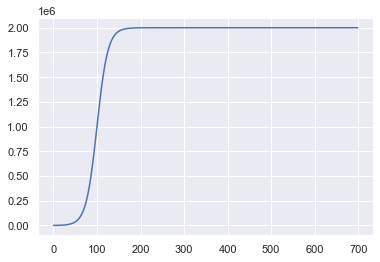

In [80]:
x = np.arange(0, 700,1)
y = sigmoid(x, 0.08,100,2000000)
plt.plot(x,y,'b',label = 'data')

X_train shape: (93,)
X_test shape: (41,)
beta_1 = 0.075450, beta_2 = 94.442315, scaler = 1850371.902953


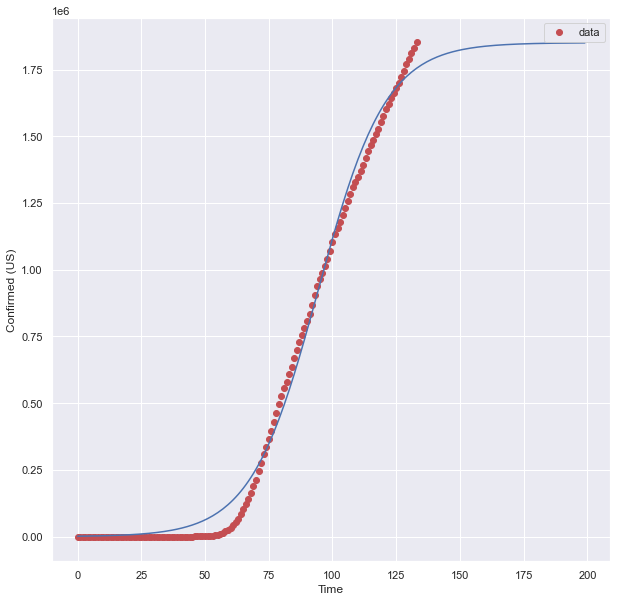

In [81]:
X = df_usTotal['Index']
y = df_usTotal['Cases']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
popt, pcov = curve_fit(sigmoid, X_train, y_train)
print("beta_1 = %f, beta_2 = %f, scaler = %f" % (popt[0], popt[1],popt[2]))
plt.figure(figsize= (10,10))
plt.plot(X, y, 'ro', label = 'data')
plt.legend(loc = 'best')
plt.ylabel('Confirmed (US)')
plt.xlabel('Time')

x = np.arange(0, 200,1)
y = sigmoid(x, popt[0], popt[1], popt[2])#sigmoid(x, 0.08,100,2000000)
plt.plot(x,y,'b',label = 'data')

plt.show()

Adjusted R-squared formula
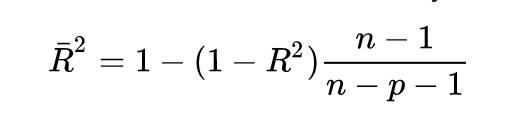

Source: https://stackoverflow.com/questions/49381661/how-do-i-calculate-the-adjusted-r-squared-score-using-scikit-learn/49381947

In [82]:
def adjustedR2(n,r2, p):
    adjustedR2 = 1-(1-r2)*((n-1)/(n-p-1))
    return adjustedR2

In [83]:
def avgPinballLoss(actual , pred):
    total = 0;
    tau = 0.95
    actual = list(actual)
    pred = list(pred)
    for i in range(len(actual)):
            forecast = pred[i]
            real = actual[i]
            if forecast > real:
                total += (1-tau)*(forecast - real)
            else:
                total += tau*(real - forecast)
    return total/len(actual)

In [ ]:
#Predictions
#Why is R2 so high??
pred = sigmoid(X_test, *popt)#our curve with parameters calcualted by above
actual = y_test
r2 = r2_score(pred,actual)
print("Mean absolute error: %.2f" % np.mean(np.absolute(pred - actual)))
#print("Mean absolute percentage error (MAPE): %.2f"% np.mean(np.absolute((pred - actual)/(actual))))
print("Residual sum of squares (MSE): %.2f" % np.mean((actual- pred) ** 2))
print("R2-score: %.2f" % r2 )
print("Adjusted R2: %.2f"% adjustedR2(len(X_test),r2,1))
print("Pinball Loss: %.2f"% avgPinballLoss(actual,pred))